In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_6126/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?',
    'Time Encoding',
    'Approx Error "Size" (for figures only)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

# drop nan time encoding
approximation_algorithms = approximation_algorithms[approximation_algorithms['Time Encoding'].notnull()]


# remove question marks from time encoding
approximation_algorithms['Time Encoding'] = approximation_algorithms['Time Encoding'].str.replace('?', '')
approximation_algorithms['Time Encoding'].value_counts()



Time Encoding
10        74
20        45
11        26
400       25
21        19
30        15
16         9
16.24      8
15         7
25         7
25.02      6
15.015     6
15.41      3
16.1       3
12.1       2
40         2
31         2
26.5       2
6          2
12         1
5          1
25.5       1
13         1
1010       1
1          1
26.65      1
600        1
60         1
500        1
16.5       1
22         1
16.2       1
15.25      1
15.019     1
16.4       1
1045       1
6.6        1
6.1        1
25.51      1
25.2       1
26.55      1
21.5       1
25.3       1
15.097     1
15.26      1
27         1
41         1
Name: count, dtype: int64

In [4]:
# read sheet1
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?',
    'Time Encoding',

]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(
    r'(\d+\.?\d*)')[0].astype(float)


sheet1['Approx Error "Size" (for figures only)'] = '0'

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(
    approximation_algorithms['Family Name'])]

# drop NaN time encoding
sheet1 = sheet1[sheet1['Time Encoding'].notnull()]

sheet1['Time Encoding'].value_counts()


Time Encoding
20         39
11         31
16         19
10         10
986         7
30          6
1000        6
1045        5
10.1        4
1010        3
15.25       3
1020        2
15.109      2
12          2
16.1        2
2000        2
21          2
15.992      1
15.614      1
15.097      1
15.41       1
11.585      1
9000        1
1984        1
960         1
15.92       1
11.1        1
988.1       1
944         1
9122        1
40          1
52          1
28.5        1
988.2       1
15.105      1
11.3        1
1515        1
942         1
26.5        1
16.2        1
15.5        1
15.47       1
15.26       1
15.24       1
15.23       1
15.107      1
15.103      1
15.101      1
988         1
15.4        1
15.95       1
16.9        1
10.0005     1
41.1        1
Name: count, dtype: int64

In [5]:
# convert time encoding into a function name following this example: 10 -> comp_fn_10_0000 , 10.5 -> comp_fn_10_5000
def encode_time_to_function_name(time_str):
    # Split on the decimal point
    parts = time_str.split('.')
    integer_part = int(parts[0])
    decimal_part = 0
    if len(parts) > 1:
        decimal_fraction = parts[1] + "0000" 
        decimal_part = int(decimal_fraction[:4])  

    function_name = f"comp_fn_{integer_part:d}_{decimal_part:04d}"
    return function_name

sheet1['Time Encoding Function'] = sheet1['Time Encoding'].apply(encode_time_to_function_name)
approximation_algorithms['Time Encoding Function'] = approximation_algorithms['Time Encoding'].apply(encode_time_to_function_name)

In [6]:
encode_time_to_function_name('6.6')

'comp_fn_6_6000'

In [7]:
import inspect
from complexity_functions import complexity_functions

elements = inspect.getmembers(complexity_functions, inspect.isfunction)
elements_dict = dict(elements)

# check if all time encoding functions are in the complexity_functions module
for time_encoding in sheet1['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(sheet1[sheet1['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


for time_encoding in approximation_algorithms['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(approximation_algorithms[approximation_algorithms['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


In [8]:
sheet1['n = 10^3'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
sheet1['n = 10^6'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
sheet1['n = 10^9'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))

approximation_algorithms['n = 10^3'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
approximation_algorithms['n = 10^6'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
approximation_algorithms['n = 10^9'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))



In [9]:
# list families that are in both datasets
sheet1_families = sheet1['Family Name'].unique()
approximation_families = approximation_algorithms['Family Name'].unique()

common_families = np.intersect1d(sheet1_families, approximation_families)
len(common_families)

approximation_algorithms['Approx Error "Size" (for figures only)'].value_counts()


Approx Error "Size" (for figures only)
1.0    141
2.0     75
2.4     27
2.6     24
4.0     23
Name: count, dtype: int64

In [10]:
# list families that are in approxmaiton_families but not in sheet1_families
missing_families = np.setdiff1d(approximation_families, sheet1_families)
missing_families

array(['Convex Optimization (Non-linear)', 'Root Computation',
       'Wiener Index'], dtype=object)

In [11]:
approximation_families

array(['Sorting', 'Matrix Chain Multiplication', 'Maximum Flow',
       'Matrix Product', 'Linear System', 'Minimum Spanning Tree (MST)',
       'Closest Pair Problem', 'All-Pairs Shortest Paths (APSP)',
       'LU Decomposition', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Convex Optimization (Non-linear)',
       'Optimal Binary Search Trees', 'Nash Equilibria',
       'Maximum-Weight Matching', 'Discrete Fourier Transform',
       'Eigenvalues (Iterative Methods)', 'Root Computation',
       'Nearest Neighbor Search', 'Cardinality Estimation',
       'The Traveling-Salesman Problem', 'The Subset-Sum Problem',
       'The Vertex Cover Problem', 'The Set-Covering Problem',
       'Link Analysis', 'Maximum Cut', 'Wiener Index',
       'Determinant of Matrices with Integer Entries'], dtype=object)

In [12]:
sheet1_families

array(['Optimal Binary Search Trees', 'The Subset-Sum Problem', 'Sorting',
       'Matrix Chain Multiplication', 'Maximum Flow', 'Matrix Product',
       'Linear System', 'Minimum Spanning Tree (MST)',
       'Closest Pair Problem', 'LU Decomposition',
       'Nearest Neighbor Search', 'The Traveling-Salesman Problem',
       'All-Pairs Shortest Paths (APSP)',
       'Eigenvalues (Iterative Methods)', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Nash Equilibria',
       'Maximum-Weight Matching', 'Discrete Fourier Transform',
       'Cardinality Estimation', 'The Vertex Cover Problem',
       'The Set-Covering Problem', 'Link Analysis', 'Maximum Cut',
       'Determinant of Matrices with Integer Entries'], dtype=object)

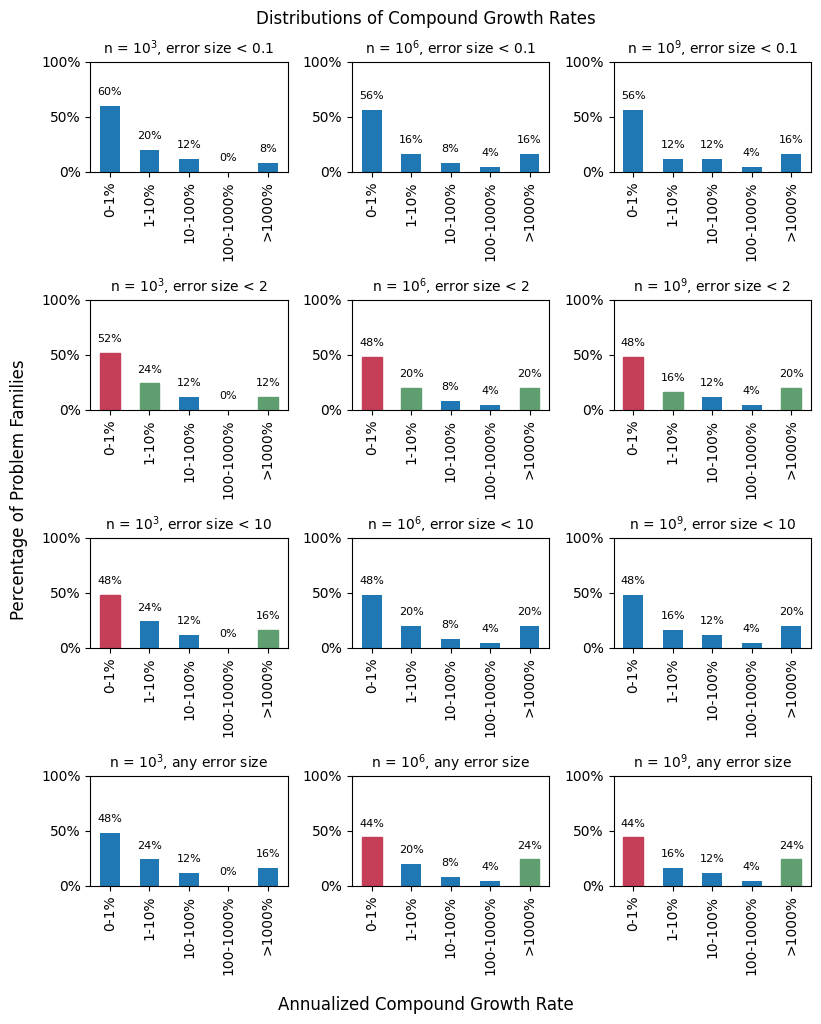

In [77]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]


def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = common_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.1, 1, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-10%', '10-100%', '100-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')

# plot 3 figures
fig, axs = plt.subplots(4, 3, figsize=(8,10))

# 1 - "smaller" than 0.1
cgr_n_3_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 0], title='n = $10^{3}$, error size < 0.1')
cgr_n_6_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 1], title='n = $10^{6}$, error size < 0.1')
cgr_n_9_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 2], title='n = $10^{9}$, error size < 0.1')

# 1 and 2
cgr_n_3_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 0], title='n = $10^{3}$, error size < 2')
cgr_n_6_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 1], title='n = $10^{6}$, error size < 2')
cgr_n_9_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 2], title='n = $10^{9}$, error size < 2')

# 1 and 2 and 2.4
cgr_n_3_e_2_6['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 0], title='n = $10^{3}$, error size < 10')
cgr_n_6_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 1], title='n = $10^{6}$, error size < 10')
cgr_n_9_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 2], title='n = $10^{9}$, error size < 10')

# 1 and 2 and 3 and 4
cgr_n_3_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 0], title='n = $10^{3}$, any error size')
cgr_n_6_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 1], title='n = $10^{6}$, any error size')
cgr_n_9_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 2], title='n = $10^{9}$, any error size')


# y-axis label from 0 to 100%
for ax in axs.flat:
    # font size title
    ax.title.set_size(10)

    ax.set(ylabel='', xlabel='')
    ax.set_ylim(0, 1)
    # format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    # rotate x-axis labels
    ax.tick_params(axis='x', rotation=90)
    


# if the value decreases, set the color to red
for  index,ax in enumerate(axs.flat):
    if index < 3:
        continue
    for pindex, p in enumerate(ax.patches):
        if axs.flat[index-3].patches[pindex].get_height() > p.get_height():
            p.set_color('#C33E56')
        elif axs.flat[index-3].patches[pindex].get_height() < p.get_height():
            p.set_color('#5F9E6E')

# add value on top of each bar
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

fig.suptitle("Distributions of Compound Growth Rates")
fig.text(0.5, -0.02, 'Annualized Compound Growth Rate', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Percentage of Problem Families', va='center', rotation='vertical', fontsize=12)




# add margin between subplots
plt.tight_layout()
plt.show()



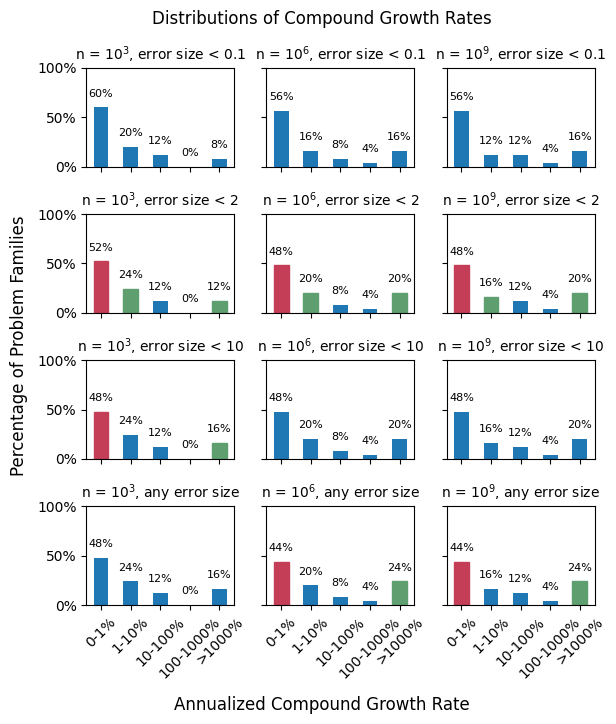

In [57]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]


def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = common_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.1, 1, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-10%', '10-100%', '100-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')

# plot 3 figures
fig, axs = plt.subplots(4, 3, figsize=(6,7), sharex=True, sharey=True)

# 1 - "smaller" than 0.1
cgr_n_3_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 0], title='n = $10^{3}$, error size < 0.1')
cgr_n_6_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 1], title='n = $10^{6}$, error size < 0.1')
cgr_n_9_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 2], title='n = $10^{9}$, error size < 0.1')

# 1 and 2
cgr_n_3_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 0], title='n = $10^{3}$, error size < 2')
cgr_n_6_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 1], title='n = $10^{6}$, error size < 2')
cgr_n_9_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 2], title='n = $10^{9}$, error size < 2')

# 1 and 2 and 2.4
cgr_n_3_e_2_6['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 0], title='n = $10^{3}$, error size < 10')
cgr_n_6_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 1], title='n = $10^{6}$, error size < 10')
cgr_n_9_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 2], title='n = $10^{9}$, error size < 10')

# 1 and 2 and 3 and 4
cgr_n_3_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 0], title='n = $10^{3}$, any error size')
cgr_n_6_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 1], title='n = $10^{6}$, any error size')
cgr_n_9_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 2], title='n = $10^{9}$, any error size')


# y-axis label from 0 to 100%
for ax in axs.flat:
    # font size title
    ax.title.set_size(10)

    ax.set(ylabel='', xlabel='')
    ax.set_ylim(0, 1)
    # format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    # rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)
    


# if the value decreases, set the color to red
for  index,ax in enumerate(axs.flat):
    if index < 3:
        continue
    for pindex, p in enumerate(ax.patches):
        if axs.flat[index-3].patches[pindex].get_height() > p.get_height():
            p.set_color('#C33E56')
        elif axs.flat[index-3].patches[pindex].get_height() < p.get_height():
            p.set_color('#5F9E6E')

# add value on top of each bar
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

fig.suptitle("Distributions of Compound Growth Rates")
fig.text(0.5, -0.02, 'Annualized Compound Growth Rate', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Percentage of Problem Families', va='center', rotation='vertical', fontsize=12)




# add margin between subplots
plt.tight_layout()
plt.show()



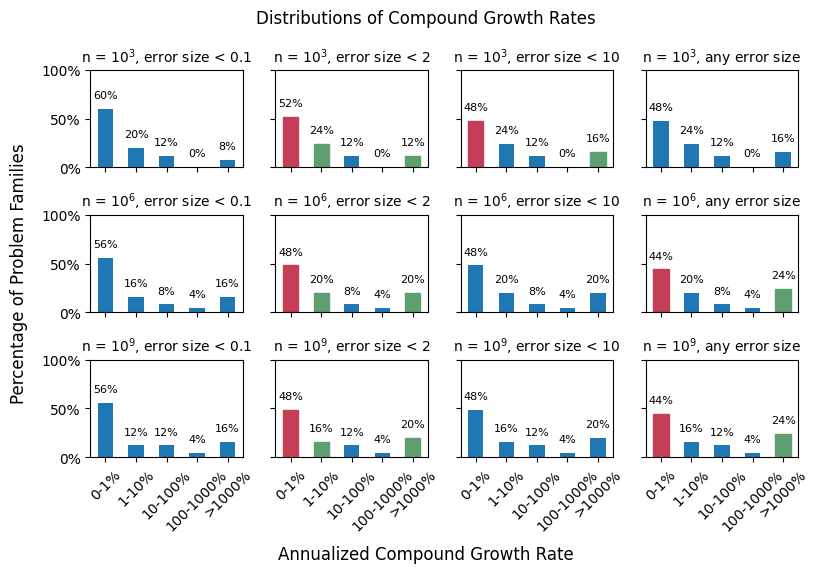

In [67]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]


def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = common_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.1, 1, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-10%', '10-100%', '100-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')

# plot 3 figures
fig, axs = plt.subplots(3, 4, figsize=(8,5.5), sharex=True, sharey=True)

# 1 - "smaller" than 0.1
cgr_n_3_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 0], title='n = $10^{3}$, error size < 0.1')
cgr_n_6_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 0], title='n = $10^{6}$, error size < 0.1')
cgr_n_9_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 0], title='n = $10^{9}$, error size < 0.1')

# 1 and 2
cgr_n_3_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 1], title='n = $10^{3}$, error size < 2')
cgr_n_6_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 1], title='n = $10^{6}$, error size < 2')
cgr_n_9_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 1], title='n = $10^{9}$, error size < 2')

# 1 and 2 and 2.4
cgr_n_3_e_2_6['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 2], title='n = $10^{3}$, error size < 10')
cgr_n_6_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 2], title='n = $10^{6}$, error size < 10')
cgr_n_9_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 2], title='n = $10^{9}$, error size < 10')

# 1 and 2 and 3 and 4
cgr_n_3_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 3], title='n = $10^{3}$, any error size')
cgr_n_6_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 3], title='n = $10^{6}$, any error size')
cgr_n_9_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 3], title='n = $10^{9}$, any error size')




# y-axis label from 0 to 100%
for ax in axs.flat:
    # font size title
    ax.title.set_size(10)

    ax.set(ylabel='', xlabel='')
    ax.set_ylim(0, 1)
    # format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    # rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)
    


# if the value decreases, set the color to red
for  index,ax in enumerate(axs.flat):
    if index % 4 == 0:
        continue
    for pindex, p in enumerate(ax.patches):
        if axs.flat[index-1].patches[pindex].get_height() > p.get_height():
            p.set_color('#C33E56')
        elif axs.flat[index-1].patches[pindex].get_height() < p.get_height():
            p.set_color('#5F9E6E')

# add value on top of each bar
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

fig.suptitle("Distributions of Compound Growth Rates")
fig.text(0.5, -0.02, 'Annualized Compound Growth Rate', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Percentage of Problem Families', va='center', rotation='vertical', fontsize=12)




# add margin between subplots
plt.tight_layout()
plt.show()

